data from ibkr 

5 sec interval pulled 

### Initialization

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, time, datetime


import warnings
from IPython.core.display import display, HTML
warnings.filterwarnings("ignore") # suppress warnings because theyre annoying and i like living on the edge
pd.set_option('display.max_columns',100) # so i can see all columns
np.set_printoptions(linewidth = 220) # increase numpy array print
display(HTML("<style>.container { width:80% !important; }</style>")) # widen jupyter notebook blocks

In [2]:
# save csv for tableau or otherwise
work_dir = 'D:/general_data/stock'
with open(work_dir + 'aapl_20201002.pkl','rb') as pickle_in:
    historic_data = pickle.load(pickle_in)

In [3]:
historic_data

[('20201002  06:30:00', 112.84, 112.93, 112.5, 112.5, 25395),
 ('20201002  06:30:05', 112.3, 112.75, 112.22, 112.61, 3029),
 ('20201002  06:30:10', 112.61, 112.9, 112.23, 112.9, 1516),
 ('20201002  06:30:15', 112.9, 113.03, 112.39, 113.0, 1823),
 ('20201002  06:30:20', 112.97, 113.11, 112.73, 113.11, 1557),
 ('20201002  06:30:25', 113.11, 113.25, 113.05, 113.25, 1219),
 ('20201002  06:30:30', 113.22, 113.27, 113.06, 113.18, 985),
 ('20201002  06:30:35', 113.19, 113.29, 113.15, 113.28, 824),
 ('20201002  06:30:40', 113.28, 113.46, 113.23, 113.44, 1010),
 ('20201002  06:30:45', 113.44, 113.46, 113.37, 113.38, 1015),
 ('20201002  06:30:50', 113.4, 113.5, 113.33, 113.48, 758),
 ('20201002  06:30:55', 113.47, 113.58, 113.45, 113.58, 1346),
 ('20201002  06:31:00', 113.58, 113.78, 113.55, 113.77, 860),
 ('20201002  06:31:05', 113.75, 113.79, 113.58, 113.6, 710),
 ('20201002  06:31:10', 113.63, 113.67, 113.57, 113.63, 875),
 ('20201002  06:31:15', 113.64, 113.66, 113.59, 113.65, 459),
 ('20201

In [4]:
df = pd.DataFrame(historic_data, columns = ['datetime','open','high','low','close','vol'])
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y%m%d  %H:%M:%S')
df = df.iloc[1:-1,:].copy()

### Data Mining

In [5]:
def price_direction(x):
    if x > 0:
        return 'up'
    elif x == 0:
        return 'no change'
    else:
        return 'down'
    
df['bar_range'] = df['high'] - df['low'] 
df['diff'] = df['close'] - df['open']
df['diff_dir'] = df['diff'].map(price_direction)
df['mid'] = (df['high'] + df['low']) / 2

In [6]:
def rsi(prices, n = 14, avg_method = 'simple'):
    # given a list of sequential price changes (prices), use len(prices) changes to calculate rsi
    # prices = numpy array
    # n = int
    # avg_method = str
    
    assert len(prices) > n, 'list of price delta less than rsi period'
    
    rsi_list = [np.nan] * n
    
    n_prices = len(prices)
    for i in range(n, n_prices):
        vals = prices[(i-n):i]
        if avg_method == 'simple':
            avgU = np.sum(vals * (vals > 0).astype(int)) / n_prices
            avgD = -1 * np.sum(vals * (vals < 0).astype(int)) / n_prices
        else:
            if avg_method = 'exponential':
                if i = n:
                    
            elif avg_method = 'wilder':
                
        
        rs = avgU / avgD
        rsi = 100.0 - 100.0 / (1 + rs)
        rsi_list.append(rsi)
    return rsi

# calculate rsi
n = 14
vals = df['diff'].to_numpy()
rsi_list = [np.nan] * n
for i in range(n, len(vals)):
    rsi_list.append(rsi(vals[(i-n):i]))
df['rsi'] = rsi_list

# calculate rsi
n = 14
vals = df['diff'].to_numpy
rsi_list = rsi(vals)

In [39]:
def rsi_vertex(rsi, upp_bound = 80, low_bound = 20):
    if rsi > upp_bound:
        return 'high rsi'
    elif rsi < low_bound:
        return 'low rsi'
    else:
        return 'no signal'
df['rsi_group'] = df['rsi'].map(lambda x: rsi_vertex(x,90,10))

In [22]:
df

datetime    open    high     low   close   vol  bar_range  \
1    2020-10-02 06:30:05  112.30  112.75  112.22  112.61  3029       0.53   
2    2020-10-02 06:30:10  112.61  112.90  112.23  112.90  1516       0.67   
3    2020-10-02 06:30:15  112.90  113.03  112.39  113.00  1823       0.64   
4    2020-10-02 06:30:20  112.97  113.11  112.73  113.11  1557       0.38   
5    2020-10-02 06:30:25  113.11  113.25  113.05  113.25  1219       0.20   
...                  ...     ...     ...     ...     ...   ...        ...   
4674 2020-10-02 12:59:30  113.25  113.25  113.20  113.20   865       0.05   
4675 2020-10-02 12:59:35  113.20  113.21  113.16  113.16  1167       0.05   
4676 2020-10-02 12:59:40  113.16  113.18  113.12  113.13  1258       0.06   
4677 2020-10-02 12:59:45  113.14  113.14  113.02  113.02  1622       0.12   
4678 2020-10-02 12:59:50  113.04  113.10  113.00  113.01  1879       0.10   

      diff diff_dir      mid        rsi  ma_last_30s          ma  rsi_group  
1     0.31       up  112.485        NaN          NaN         NaN  no signal  
2     0.29       up  112.565        NaN          NaN         NaN  no signal  
3     0.10       up  112.710        NaN          NaN         NaN  no signal  
4     0.14       up  112.920        NaN          NaN         NaN  no signal  
5     0.14       up  113.150        NaN          NaN         NaN  no signal  
...    ...      ...      ...        ...          ...         ...        ...  
4674 -0.05     down  113.225  73.076923   113.231667  113.168750  no signal  
4675 -0.04     down  113.185  60.000000   113.234167  113.174375  no signal  
4676 -0.03     down  113.150  54.545455   113.224167  113.177708  no signal  
4677 -0.12     down  113.080  48.571429   113.212500  113.179583  no signal  
4678 -0.03     down  113.050  30.232558   113.185833  113.177708  no signal  

[4678 rows x 14 columns]

Correlation: 0.51


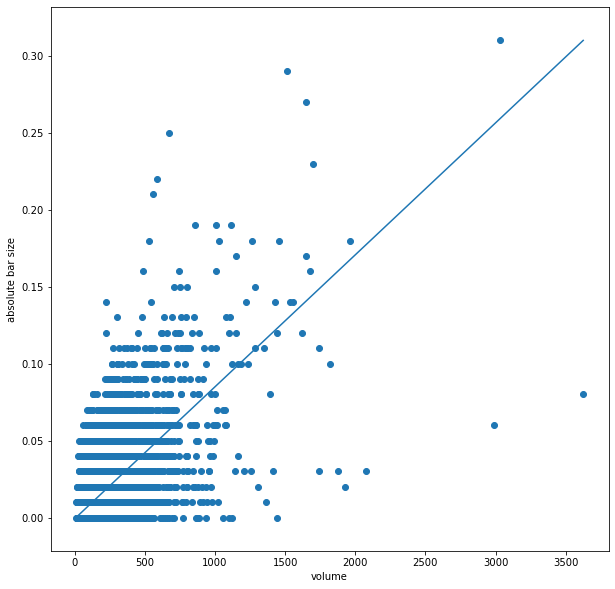

In [47]:
## correlation between volume and diff

from scipy.stats import pearsonr

x = df['vol'].values
y = np.abs(df['diff'].values)
plt.figure(figsize = [10,10])
corr = pearsonr(x,y)[0]
print('Correlation: ' + str(round(corr, 2)))
plt.scatter(x,y)
plt.plot([min(x),max(x)],[min(y),max(y)])
plt.xlabel('volume')
plt.ylabel('absolute bar size')
plt.show()

In [40]:
ma_range = 24
vals = df['mid'].to_numpy()
ma_list = [np.nan] * ma_range
for i in range(ma_range, len(vals)):
    ma = np.mean(vals[(i-ma_range):i])
    ma_list.append(ma)
df['ma'] = ma_list

In [48]:
ma_range = 120
vals = df['mid'].to_numpy()
ma_list = [np.nan] * ma_range
for i in range(ma_range, len(vals)):
    ma = np.mean(vals[(i-ma_range):i])
    ma_list.append(ma)
df['ma_5min'] = ma_list

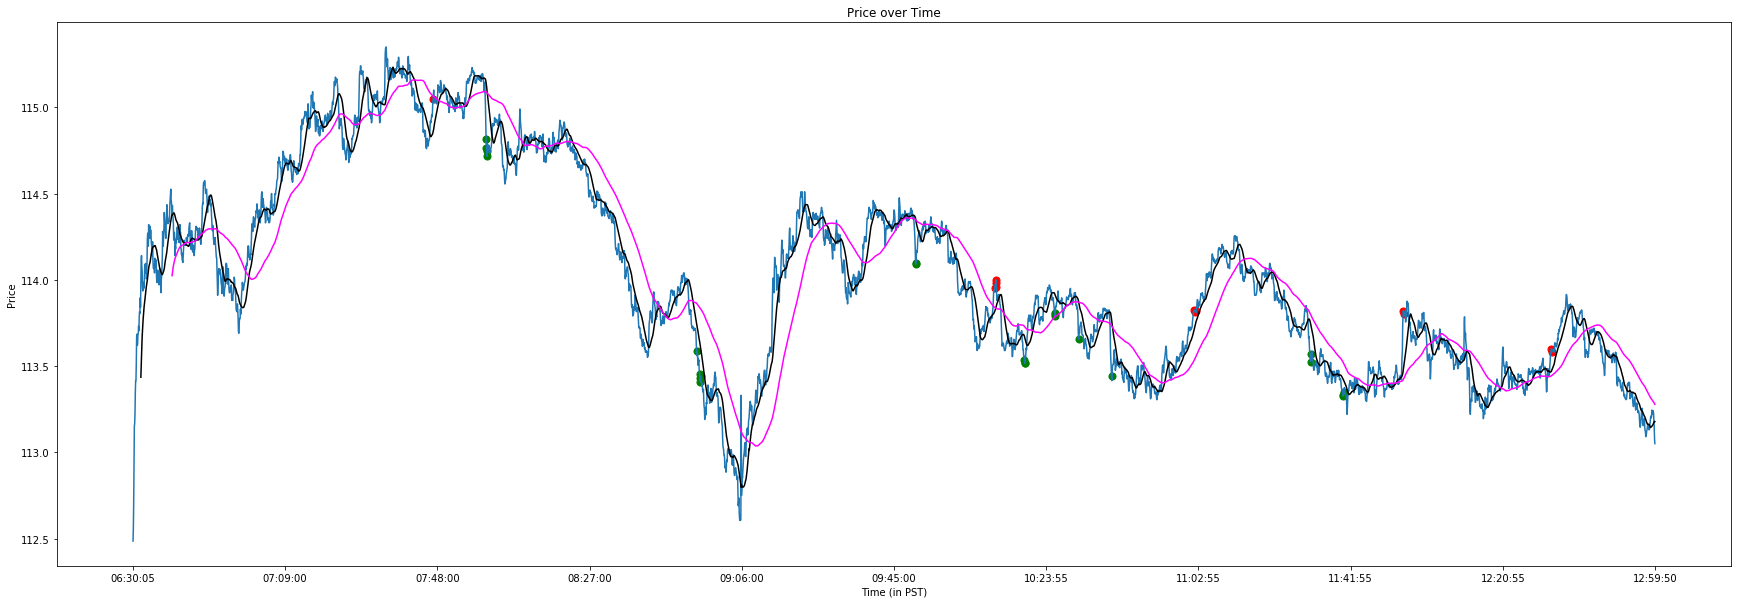

In [50]:
## view price over time 

vals = df['mid'].values
x = range(len(vals))
y = vals
y2 = df['ma'].values
y3 = df['ma_5min'].values

xlab = df['datetime'].dt.time.astype(str).values
xtick_locs = np.arange(0,len(x),len(x) / 10)
xtick_locs = list(map(int, xtick_locs)); xtick_locs.append(len(x)-1)
xlab = [xlab[i] for i in xtick_locs]

plt.figure(figsize = [30,10])


plt.plot(x,y) # plot mid price
plt.xticks(xtick_locs,xlab)
plt.xlabel('Time (in PST)')
plt.ylabel('Price')
plt.title('Price over Time')
plt.plot(x,y2, c = 'k') # plot moving average
plt.plot(x,y3, c = 'magenta') # plot moving average

vals = df['rsi_group'].values
high_inds = np.where(vals == 'high rsi')[0]
x2 = np.array(x)[high_inds]
y2 = df['mid'].values[high_inds]
plt.scatter(x2, y2, c = 'r', s = 50)

low_inds = np.where(vals == 'low rsi')[0]
x3 = np.array(x)[low_inds]
y3 = df['mid'].values[low_inds]
plt.scatter(x3, y3, c = 'g', s = 50)


plt.show()

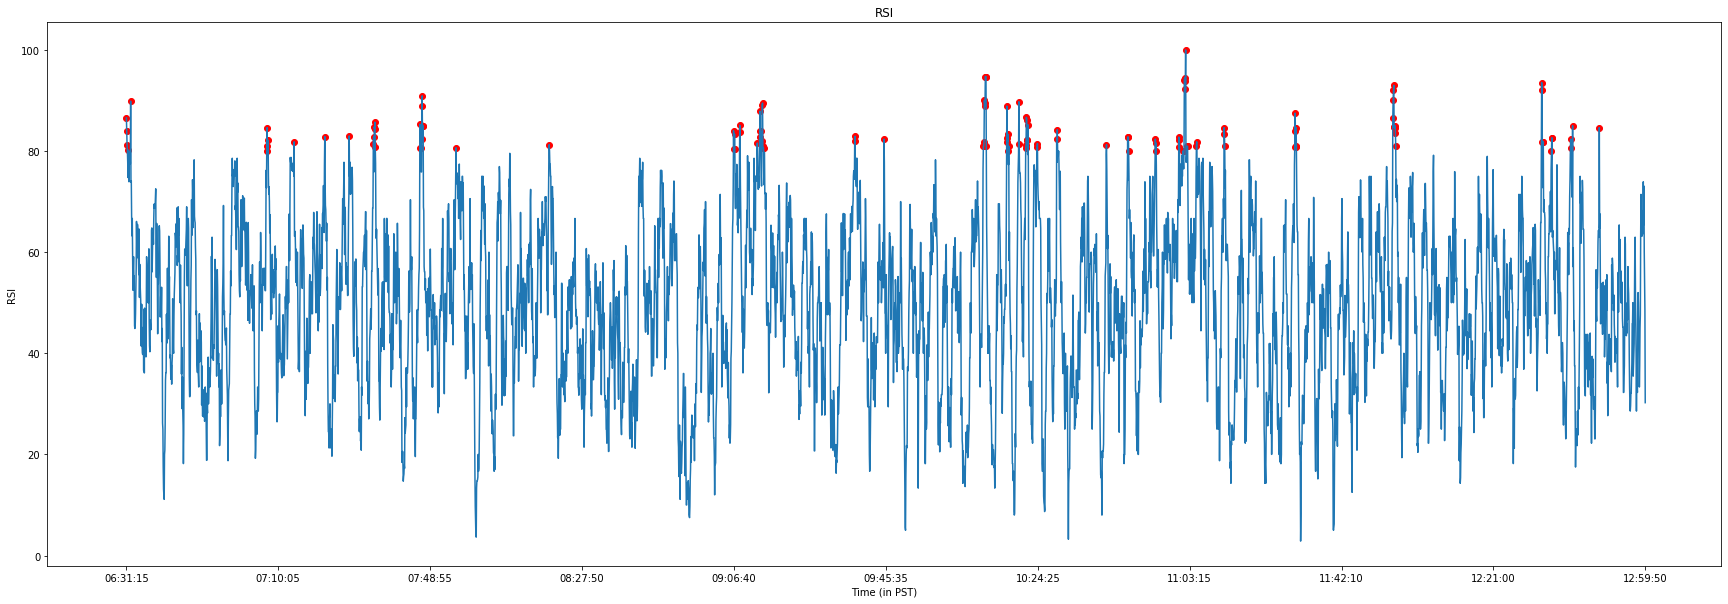

In [32]:
## view rsi over time
vals = df['rsi'].iloc[n:].values
x = range(len(vals))
y = vals
xlab = df['datetime'].dt.time.iloc[n:].astype(str).values

xtick_locs = np.arange(0,len(x),len(x) / 10)
xtick_locs = list(map(int, xtick_locs)); xtick_locs.append(len(x)-1)
xlab = [xlab[i] for i in xtick_locs]
plt.figure(figsize = [30,10])
plt.plot(x,y)
plt.xticks(xtick_locs,xlab)
plt.xlabel('Time (in PST)')
plt.ylabel('RSI')
plt.title('RSI')

vals = df['rsi_group'].values
high_inds = np.where(vals == 'high rsi')[0]
x2 = np.array(x)[high_inds] - n
y2 = df['rsi'].values[high_inds]
plt.scatter(x2, y2, c = 'r')

plt.show()

In [28]:
np.array(x)[high_inds]

range(0, 4664)

In [29]:
np.array(x)[high_inds]

array([  14,   15,   16,   20,   27,  445,  446,  447,  449,  529,  623,  698,  772,  773,  775,  776,  777,  778,  915,  916,  917,  921,  922,  923,  924,  925, 1026, 1312, 1878, 1880, 1881, 1882, 1897, 1898, 1951,
       1958, 1959, 1960, 1961, 1965, 1966, 1967, 1968, 1969, 1970, 2250, 2251, 2340, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2717, 2718, 2719, 2720, 2721, 2723, 2754, 2755, 2775, 2776, 2777, 2778,
       2779, 2780, 2782, 2810, 2811, 2870, 2872, 3023, 3088, 3090, 3091, 3173, 3174, 3175, 3245, 3246, 3247, 3257, 3261, 3262, 3263, 3264, 3265, 3266, 3271, 3272, 3299, 3300, 3384, 3385, 3386, 3601, 3602, 3603, 3604,
       3605, 3606, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 4359, 4360, 4361, 4362, 4364, 4389, 4390, 4391, 4448, 4449, 4454, 4536])

In [31]:
df['rsi'].values[:20]

array([        nan,         nan,         nan,         nan,         nan,         nan,         nan,         nan,         nan,         nan,         nan,         nan,         nan,         nan, 86.55913978, 83.97435897,
       81.20300752, 80.        , 77.87610619, 74.74747475])